# МНОЖЕСТВЕННЫЙ РЕГРЕССИОННЫЙ АНАЛИЗ

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

sns.set(rc={'figure.figsize':(12,6)}, style='whitegrid')

### 1

Загрузим данные, проверим типы, пропущенные значения. 

Сколько пропущенных значений встретилось в датасете?

In [101]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [102]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [103]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### 2

Сгенерируем первый признак.

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (company). Для этого используем столбец CarName, разбъем значения ячеек по пробелу и запишите в колонку первый элемент. Например:

'audi 100 ls' → 'audi'
Сколько всего уникальных марок машины встречается в датасете? 

In [34]:
df['CarName'].value_counts() 

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [104]:
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [105]:
df['CompanyName'].nunique()

28

In [93]:
df['cylindernumber'].value_counts() 

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

### 3

Теперь внимательнее посмотрим на уникальные значения company. Часть из них оказалась с ошибками!

- 'maxda' → 'mazda'  
- 'Nissan' → 'nissan'  
- 'porcshce' → 'porsche'  
- 'toyouta' → 'toyota'  
- 'vokswagen' & 'vw' → 'volkswagen'  
Сколько уникальных производителей осталось в итоге?

In [106]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [107]:
# приведем к нижнему Регистрку Nissan
df['CompanyName'] = df['CompanyName'].str.lower()

In [108]:
def ren(to_rep, how_rep):
    df['CompanyName']=df['CompanyName'].replace(to_rep, how_rep)


In [109]:
ren('maxda', 'mazda')
ren('porcshce', 'porsche')
ren('toyouta', 'toyota')
ren('vokswagen', 'volkswagen')
ren('vw', 'volkswagen')

In [110]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [111]:
df.CompanyName.nunique()

22

In [112]:
df.drop(['CarName'],axis=1,inplace=True)

### 4

### Возьмем только числовые колонки

In [113]:
df.shape

(205, 26)

In [114]:
df.dtypes

car_ID                int64
symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CompanyName          object
dtype: object

In [115]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CompanyName'],
      dtype='object')

In [ ]:
df.corr() # НЕ ПОЛУЧИТСЯ ПОСТРОИТЬ ДЛЯ КОЛОНОК с типом object!!!!!!!!!!!!!!

In [116]:
cols_to_keep2 = ['car_ID', 'symboling', 'wheelbase','carlength', 'carwidth', 'carheight', 
                  'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio', 
                  'horsepower', 'peakrpm', 'citympg', 'highwaympg','price'] # возьмем только числовые колонки

In [117]:
df2=df[cols_to_keep2]
df2.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


### 5

Последний шаг в подготовке данных: **линейная регрессия в python не справляется с категориальными переменными (типом object в pandas)**, поэтому давайте применим pd.get_dummies(). Пример использования:

df_dummy = pd.get_dummies(data=cars[[список_столбцов_типа_object]], drop_first = True)

In [118]:
df.dtypes

car_ID                int64
symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CompanyName          object
dtype: object

In [76]:
df.shape

(205, 26)

In [119]:
#ВОЗЬМЕМ ИНТЕРЕСНЫЕ НАМ КОЛОНКИ С ТИПОМ object
dummy= pd.get_dummies(data=df[['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',  'enginetype', 'cylindernumber', 'fuelsystem']],dtype=int)#,drop_first=True)
dummy

,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
test=pd.Series(["a","b","c","d"])
print(pd.get_dummies(test))
print(pd.get_dummies(test, drop_first=True))


       a      b      c      d
0   True  False  False  False
1  False   True  False  False
2  False  False   True  False
3  False  False  False   True
       b      c      d
0  False  False  False
1   True  False  False
2  False   True  False
3  False  False   True


get_dummies(test, **drop_first=True**) : Видим что колонку "a" из вывода get_dummies(test)- можно легко вычислить, смотря на False и True в строках get_dummies(test, drop_first=True)

Для столбца "company"(и остальных из df) c числом уникальных элементов n построим n-1 столбец "dummy"

In [120]:
dummy= pd.get_dummies(data=df[['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',  'enginetype', 'cylindernumber', 'fuelsystem']],dtype=int, drop_first=True)
dummy

,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [121]:
cars_lr=df2.join(dummy)

In [122]:
cars_lr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [123]:
cars_lr.shape

(205, 66)

### 6

Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower.
Какой процент изменчивости объясняет полученная модель? ($R^2$)

In [86]:
results = smf.ols('price ~ horsepower', cars_lr).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.48e-48
Time:                        08:11:37   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

### 7

Теперь – модель со всеми предикторами и модель с несколькими предикторами. 
Какую модель лучше оставить, какая дает наибольший $R^2$?

## Train-Test разделение на обучающую и тестовую выборку

In [132]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

train_test_split разделяет DataFrame cars_lr на две выборки:

train_size=0.7 — указывает, что 70% данных из cars_lr будут отнесены к обучающей выборке (df_train).
test_size=0.3 — указывает, что оставшиеся 30% данных будут отнесены к тестовой выборке (df_test).


random_state=100 — этот параметр задает начальное состояние генератора случайных чисел для обеспечения воспроизводимости разделения данных.
Если вы хотите, чтобы разделение данных было случайным, но всегда одинаковым при разных запусках, этот параметр нужен для гарантированного результата. Если не указать random_state, то разделение будет случайным, и каждый запуск может дать разные результаты.

### Разделим все предикторы и цену на переменные X, Y. Отмаштабируем

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [134]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
#Y-это столбец price, a X-cars_lr без столбца price
y_train = df_train.pop('price')
X_train = df_train

In [139]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm
    

In [140]:
model1 = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           3.34e-49
Time:                        11:58:38   Log-Likelihood:                 282.04
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                      84   BIC:                            -271.3
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

Мы создали модель и видим, в ней присутствует мультиколлинеарность. О ней нам говорят выскоие p-value многих предикторов в модели. В корреляционной матрице также было предикторы с высокой корреляцией >0,8. 
Удалим предикторы с p-value>0,05

In [156]:
X_train1 = X_train.drop(
['car_ID', 'symboling','wheelbase', 'carlength', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'carbody_hardtop',
 'carbody_sedan','carbody_wagon','drivewheel_fwd','drivewheel_rwd','enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','cylindernumber_six',
'CompanyName_audi','CompanyName_buick','CompanyName_chevrolet','CompanyName_dodge','CompanyName_honda','CompanyName_isuzu','CompanyName_jaguar','CompanyName_mazda','CompanyName_nissan','CompanyName_porsche','CompanyName_renault','CompanyName_saab',
 'CompanyName_subaru','CompanyName_toyota','CompanyName_volkswagen','CompanyName_volvo','cylindernumber_two','fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spdi'], axis=1)

In [157]:
X_train1

,carwidth,carheight,curbweight,enginesize,boreratio,stroke,peakrpm,CompanyName_bmw,CompanyName_mercury,CompanyName_mitsubishi,...,aspiration_turbo,doornumber_two,carbody_hatchback,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,fuelsystem_spfi
122,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,5500,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,5500,0,0,0,...,0,1,1,0,0,0,1,0,0,0
166,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,6600,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,5000,0,0,0,...,0,1,0,0,0,0,1,0,0,0
199,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,5100,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.425000,0.336283,0.354926,0.184906,0.388889,0.641414,5500,0,0,1,...,1,0,0,0,0,0,1,0,0,0
103,0.516667,0.646018,0.609775,0.452830,0.595238,0.545455,5200,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0.833333,0.769912,0.786268,0.460377,0.714286,0.732323,4350,0,0,0,...,1,0,0,0,0,1,0,0,0,0
24,0.291667,0.247788,0.185803,0.109434,0.230159,0.525253,5500,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [149]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [159]:
checkVIF(X_train1)

C:\Users\konst\.conda\envs\Project_one\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
3,enginesize,115.99
6,peakrpm,91.79
2,curbweight,80.93
0,carwidth,44.22
19,cylindernumber_four,42.70
4,boreratio,38.01
5,stroke,35.85
12,fueltype_gas,21.62
1,carheight,17.41
17,enginetype_rotor,6.08


### Удалим столбцы с высокой коллинеарностью

In [160]:
X_train2=X_train1.drop(['enginesize','peakrpm', 'curbweight','cylindernumber_four','boreratio','carwidth','stroke','fueltype_gas','carheight','enginetype_rotor'],axis=1)

In [162]:
model3 = build_model(X_train2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     9.108
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           6.05e-12
Time:                        12:42:32   Log-Likelihood:                 57.561
No. Observations:                 143   AIC:                            -91.12
Df Residuals:                     131   BIC:                            -55.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

C:\Users\konst\.conda\envs\Project_one\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


$R^2$  у нас резко понизился - понимаем что такой подход нам **не подходит** 

## Рассмотрим рекурсивное исключение признаков

### Обучим модель линейной регрессии на данных X_train1 (обучающие признаки) и y_train (обучающие целевые значения). 

In [155]:
lm = LinearRegression()
lm.fit(X_train1,y_train)

LinearRegression()

In [163]:
# Создаем объект RFE, указав модель и количество признаков
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)  # 10 - это количество признаков, которые мы хотим оставить
# Обучаем модель RFE
rfe = rfe.fit(X_train1, y_train)

In [165]:
selected_features = X_train1.columns[rfe.support_]
# Выводим выбранные признаки
print("Выбранные признаки:", selected_features)

Выбранные признаки: Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CompanyName_bmw', 'enginelocation_rear', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')


In [166]:
X_train_rfe = X_train[X_train1.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,stroke,CompanyName_bmw,enginelocation_rear,enginetype_rotor,cylindernumber_three,cylindernumber_twelve
122,0.291667,0.272692,0.139623,0.230159,0.525253,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,0.464646,0,0,0,0,0
166,0.308333,0.314973,0.139623,0.444444,0.449495,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,0.247475,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,0.484848,0,0,0,0,0


### Создадим модель с выбранными признаками

In [167]:
model4 = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           3.04e-64
Time:                        12:52:36   Log-Likelihood:                 189.87
No. Observations:                 143   AIC:                            -357.7
Df Residuals:                     132   BIC:                            -325.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

### Уберем последний ненужный предиктор и создадим финальную модель

In [168]:
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [169]:
model5 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.35e-64
Time:                        12:56:11   Log-Likelihood:                 187.99
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     133   BIC:                            -326.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1315 

In [170]:
X_train_new = sm.add_constant(X_train_new) 
X_train_new

,const,carwidth,curbweight,enginesize,boreratio,stroke,CompanyName_bmw,enginelocation_rear,enginetype_rotor,cylindernumber_three
122,1.0,0.291667,0.272692,0.139623,0.230159,0.525253,0,0,0,0
125,1.0,0.666667,0.500388,0.339623,1.000000,0.464646,0,0,0,0
166,1.0,0.308333,0.314973,0.139623,0.444444,0.449495,0,0,0,0
1,1.0,0.316667,0.411171,0.260377,0.626984,0.247475,0,0,0,0
199,1.0,0.575000,0.647401,0.260377,0.746032,0.484848,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.354926,0.184906,0.388889,0.641414,0,0,0,0
103,1.0,0.516667,0.609775,0.452830,0.595238,0.545455,0,0,0,0
67,1.0,0.833333,0.786268,0.460377,0.714286,0.732323,0,0,0,0
24,1.0,0.291667,0.185803,0.109434,0.230159,0.525253,0,0,0,0


## Спрогнозируем результаты на основе нашего набора данных

In [172]:
y_train_price = model5.predict(X_train_new)

C:\Users\konst\AppData\Local\Temp\ipykernel_7568\2602634344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 28)


Text(0.5, 0, 'Ошибки')

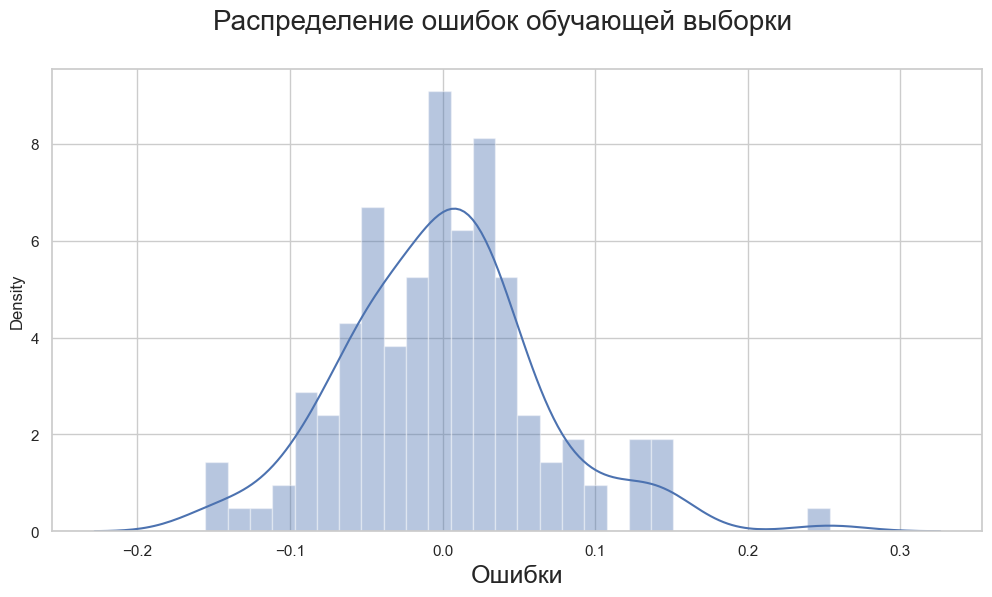

In [198]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 28)
fig.suptitle('Распределение ошибок обучающей выборки', fontsize = 20) 
plt.xlabel( 'Ошибки', fontsize = 18)


Видим что распределение ошибок предсказания обучающей выборки примерно нормально и колеблется около 0

## Предсказание на тестовой выборке

In [191]:
num_vars = ['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'price', 'CompanyName_bmw', 'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three']

df_test1 = pd.DataFrame(scaler.fit_transform(df_test[num_vars]), columns=num_vars) 

In [192]:
df_test1

,carwidth,curbweight,enginesize,boreratio,stroke,price,CompanyName_bmw,enginelocation_rear,enginetype_rotor,cylindernumber_three
0,0.200000,0.132148,0.082969,0.515873,0.524590,0.058474,0.0,0.0,0.0,0.0
1,0.315789,0.219125,0.131004,0.515873,0.726776,0.077398,0.0,0.0,0.0,0.0
2,0.421053,0.271985,0.187773,0.674603,0.721311,0.086148,0.0,0.0,0.0,0.0
3,0.157895,0.214320,0.082969,0.555556,0.551913,0.097473,0.0,0.0,0.0,0.0
4,0.136842,0.202307,0.126638,0.857143,0.311475,0.055099,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,0.221053,0.344065,0.187773,0.634921,0.759563,0.088048,0.0,0.0,0.0,0.0
58,0.400000,0.476694,0.336245,0.841270,1.000000,0.189120,0.0,0.0,0.0,0.0
59,0.315789,0.212398,0.078603,0.373016,0.726776,0.059399,0.0,0.0,0.0,0.0
60,0.000000,0.265738,0.135371,0.484127,0.825137,0.122397,0.0,0.0,0.0,0.0


In [193]:
y_test = df_test1.pop('price')
X_test = df_test1

In [194]:
X_test_new = pd.DataFrame(sm.add_constant(X_test))

In [195]:
X_test_new

,const,carwidth,curbweight,enginesize,boreratio,stroke,CompanyName_bmw,enginelocation_rear,enginetype_rotor,cylindernumber_three
0,1.0,0.200000,0.132148,0.082969,0.515873,0.524590,0.0,0.0,0.0,0.0
1,1.0,0.315789,0.219125,0.131004,0.515873,0.726776,0.0,0.0,0.0,0.0
2,1.0,0.421053,0.271985,0.187773,0.674603,0.721311,0.0,0.0,0.0,0.0
3,1.0,0.157895,0.214320,0.082969,0.555556,0.551913,0.0,0.0,0.0,0.0
4,1.0,0.136842,0.202307,0.126638,0.857143,0.311475,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,1.0,0.221053,0.344065,0.187773,0.634921,0.759563,0.0,0.0,0.0,0.0
58,1.0,0.400000,0.476694,0.336245,0.841270,1.000000,0.0,0.0,0.0,0.0
59,1.0,0.315789,0.212398,0.078603,0.373016,0.726776,0.0,0.0,0.0,0.0
60,1.0,0.000000,0.265738,0.135371,0.484127,0.825137,0.0,0.0,0.0,0.0


In [196]:
y_pred = model5.predict(X_test_new)

### Сравнение производительности модели при обучении и тестировании (обобщение)

In [197]:
from sklearn.metrics import r2_score 
print("Тестовый прогноз R-Sqrd: ", r2_score(y_test, y_pred))

Тестовый прогноз R-Sqrd:  0.7647144910906409


R-squared значение для обучающих данных составляет 90,9%, а для тестовых данных - 76% Что достаточно прилично

C:\Users\konst\AppData\Local\Temp\ipykernel_7568\1458335595.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins = 30)


Text(0.5, 0, 'Ошибки')

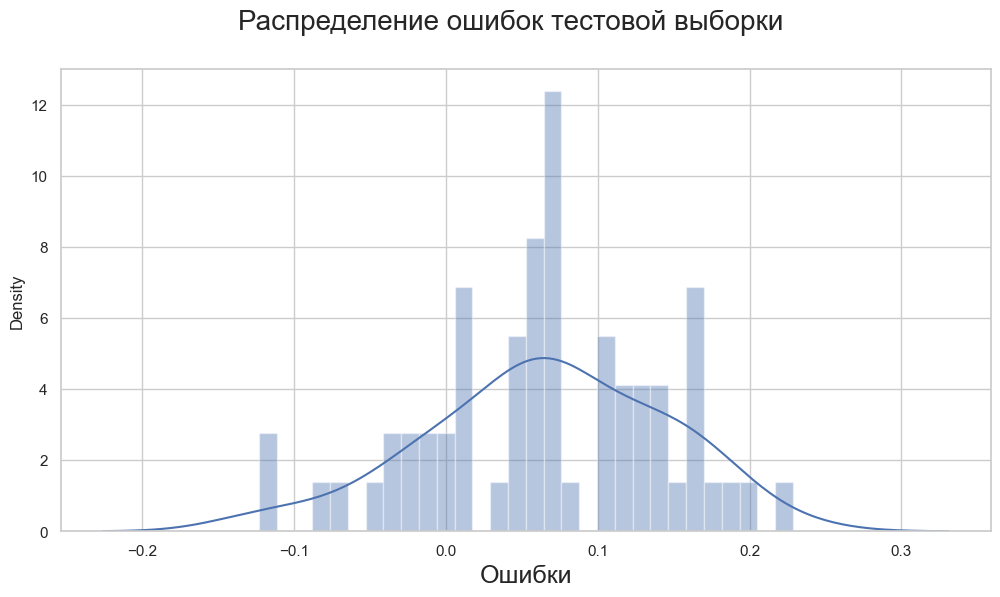

In [199]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 30)
fig.suptitle('Распределение ошибок тестовой выборки', fontsize = 20) 
plt.xlabel( 'Ошибки', fontsize = 18)


Вцелом распределение ошибок предсказания тестовой выборки примерно нормально и колеблется около 0